In [1]:
import numpy as np
import pandas as pd

<p>In this notebook, we would be predicting employee attrition based on various features like satisfaction and salary levels. For this purpose we would be using Logistic Regression.</p>

In [7]:
# Loading the data
df = pd.read_csv(r'C:\Users\pc\Desktop\Machine Learning Guides\ML and DL\Data\HR_comma_sep.csv')

In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [10]:
df.duplicated().sum()

3008

In [11]:
df.shape

(14999, 10)

In [12]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
# One Hot Encoding the Categorical columns like Department and Salary

from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder = OneHotEncoder(drop='first', sparse=False)

encoded_cols = encoder.fit_transform(df[['Department', 'salary']])

# Get new column names
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Department', 'salary']))

# Concatenate with original dataframe
df_final = pd.concat([df.drop(['Department', 'salary'], axis=1), encoded_df], axis=1)

C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: >

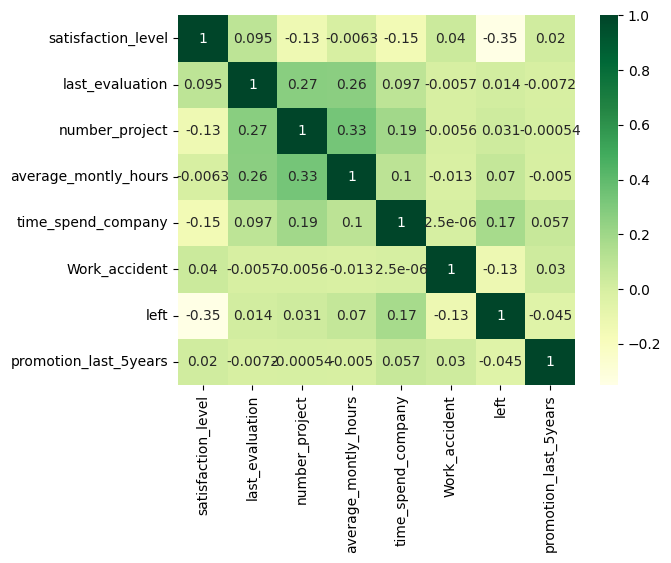

In [ ]:
# visualizing corelation between variables
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGn')

In [30]:
df_final.isnull().sum()

satisfaction_level        9
last_evaluation           9
number_project            9
average_montly_hours      9
time_spend_company        9
Work_accident             9
left                      9
promotion_last_5years     9
Department_RandD          9
Department_accounting     9
Department_hr             9
Department_management     9
Department_marketing      9
Department_product_mng    9
Department_sales          9
Department_support        9
Department_technical      9
salary_low                9
salary_medium             9
dtype: int64

In [31]:
df_final.dropna(inplace=True)

In [32]:
# Separating the dependent and independent features
x = df_final.drop('left', axis=1)
y = df_final['left']

In [33]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: left, dtype: float64

In [35]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
# Building the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=500) # max iter decides for how many iterations the model will train

In [39]:
# training the data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [40]:
prediction = log_reg.predict(X_test)

In [41]:
# Evaluating the model
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction)

0.8237650200267023

<h3>The model achieved accuracy score of 82.3%.</h3>